In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding = 'latin-1')

In [6]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


*On the basis of the information on the readme file and our visual observation of this data,For a its proper usage and manipulation and also precision of our statistical data analysis,we have some cleaning work to do.*

*Thus in order to determine the five most common journals and the total articles for each them,the number one
challenge is seeing the same journal writen different ways.Some of them are abbreviated and some of them are shortened which is difficult to run it as is as it will treat the same journals as different and this inturn messes our analysis.eg. 'J Med Chem' is the same as 'Journal of Medicinal Chemistry' but treated as different category.We also do not have information as wheather they are really the same or they just look the same.so to clean all it requires conciderable amount of time and manual work.*


lets remove the null values from our main study variable.

In [7]:
Non_null_df = df.dropna(subset=['Journal title'])

In [8]:
import re
Journal_title = Non_null_df['Journal title']
Journal_title.head()

0    Psychological Medicine
1         Biomacromolecules
2                J Med Chem
3                J Med Chem
4                J Org Chem
Name: Journal title, dtype: object

From many of the values in the 'Journal title' field,we can read a common pattern that the same Journals' names are
written differently but abbrevated to mean the same journal.So based on that pattern lets just take the first letter 
of each word in the journal title name and that way they have the same values.

In [9]:
segment_jtitle = Journal_title.apply(lambda x: re.findall(r'[A-Z][a-z]*', x))
segmented_df = pd.DataFrame(segment_jtitle)
segmented_df.head()
segmented_df['Abrevated_JT'] = segmented_df['Journal title'].apply(lambda x: ''.join(map(lambda y: y[0] , x)))
new_df = Non_null_df.merge(segmented_df,right_index=True, left_index = True)
new_df.head()

,PMID/PMCID,Publisher,Journal title_x,Article title,COST (£) charged to Wellcome (inc VAT when charged),Journal title_y,Abrevated_JT
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00,"[Psychological, Medicine]",PM
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,[Biomacromolecules],B
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,"[J, Med, Chem]",JMC
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,"[J, Med, Chem]",JMC
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,"[J, Org, Chem]",JOC


we want to use the Cost field values for statistical quantitative data analysis.there fore we want convert the values 
to float getting ride of the currency sign.

In [10]:
new_df['Cost'] = new_df['COST (£) charged to Wellcome (inc VAT when charged)'].str.split('£').str[1]
new_df['Cost'] = new_df['Cost'].apply(lambda x: float(x))

In [26]:
new_df.head()

,PMID/PMCID,Publisher,Journal title_x,Article title,COST (£) charged to Wellcome (inc VAT when charged),Journal title_y,Abrevated_JT,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00,"[Psychological, Medicine]",PM,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,[Biomacromolecules],B,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,"[J, Med, Chem]",JMC,642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,"[J, Med, Chem]",JMC,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,"[J, Org, Chem]",JOC,685.88


*To complete this challenge, determine the five most common journals and the total articles for each?
the number one question in mind for answering this question is,what determines the commonity of journals.Are they common based on their cost or number of articles in each journal?or there is a secret code in the PMID/PMCID?In this case lets try to determine that based on the number of articles in each journal.*

In [11]:
new_df['Abrevated_JT'].value_counts().head()

PLSO      92
PLSONE    65
JBC       59
N         55
B         45
Name: Abrevated_JT, dtype: int64

In [12]:
new_df[['Abrevated_JT','Journal title_x']][new_df['Abrevated_JT'] == 'PLSO'].head(2)

,Abrevated_JT,Journal title_x
1296,PLSO,PLoS One
1305,PLSO,PLoS One


In [13]:
new_df[['Abrevated_JT','Journal title_x']][new_df['Abrevated_JT'] == 'PLSONE'].head(2)

,Abrevated_JT,Journal title_x
1282,PLSONE,PLoS ONE
1284,PLSONE,PLoS ONE


from the two above senarios we can learn that we still have more cleaning work to do.The two Journal titles are 
spelled in different capslog.so lets try to fix that at the top of the equation before we abrevate it.

In [14]:
jr_title = Journal_title.apply(lambda f: ' '.join(map(lambda g: g.capitalize(),f.split())))
jr_title.head()

0    Psychological Medicine
1         Biomacromolecules
2                J Med Chem
3                J Med Chem
4                J Org Chem
Name: Journal title, dtype: object

In [16]:
segment_jrtitle = jr_title.apply(lambda x: re.findall(r'[A-Z][a-z]*', x))
segmented_df1 = pd.DataFrame(segment_jrtitle)
segmented_df1['Abrevated_JT'] = segmented_df1['Journal title'].apply(lambda x: ''.join(map(lambda y: y[0] , x)))
new_df1 = Non_null_df.merge(segmented_df1,right_index=True, left_index = True)
new_df1.head()

,PMID/PMCID,Publisher,Journal title_x,Article title,COST (£) charged to Wellcome (inc VAT when charged),Journal title_y,Abrevated_JT
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00,"[Psychological, Medicine]",PM
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,[Biomacromolecules],B
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,"[J, Med, Chem]",JMC
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,"[J, Med, Chem]",JMC
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,"[J, Org, Chem]",JOC


Lets run again the above code to see if we have achieved our goal of cleaning

In [17]:
new_df1['Abrevated_JT'].value_counts().head()
#We can see the PO now is combined from several the same values

PO      191
N        67
B        57
JOBC     54
P        46
Name: Abrevated_JT, dtype: int64

Therefore the above five journals are are the most common ones based on the number of articles published in the 
journals.

In [22]:
new_df1['Cost'] = new_df1['COST (£) charged to Wellcome (inc VAT when charged)'].str.split('£').str[1]
new_df1['Cost'] = new_df1['Cost'].apply(lambda x: float(x))
mean_df = new_df1.groupby('Abrevated_JT').mean()
mean_df.head()

,Cost
Abrevated_JT,
A,2011.396
AAA,2040.000
AAAC,1829.445
AAR,1500.000
AARIA,1823.760


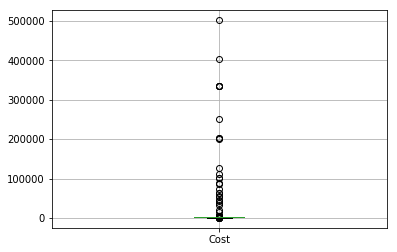

In [24]:
quantile = mean_df.Cost.quantile(0.99)
outliers_removed = mean_df[mean_df.Cost < quantile]
outliers_removed.boxplot()

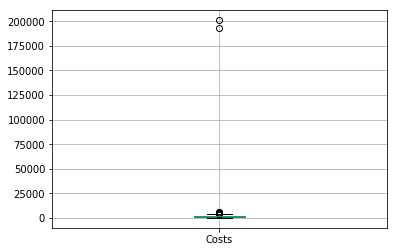

In [228]:
quantile = new_df["Costs"].quantile(0.99)
outliers_removed = new_df[new_df['Costs'] < quantile]
outliers_removed.boxplot()

In [72]:
#the same journal titles with different captalization in the title makes, it look like different journals 
#they should be brought to the same capitalization format.
df['Journal title'].str.capitalize()

0                                  Psychological medicine
1                                       Biomacromolecules
2                                              J med chem
3                                              J med chem
4                                              J org chem
5                          Journal of medicinal chemistry
6                            Journal of proteome research
7                                               Mol pharm
8                                    Acs chemical biology
9                                    Acs chemical biology
10           Journal of chemical information and modeling
11                         Journal of medicinal chemistry
12                         Journal of medicinal chemistry
13                                           Biochemistry
14                         Journal of medicinal chemistry
15                                       Gastroenterology
16                        Journal of biological chemistry
17            